In [ ]:
# Data Science Life Cycle 

In [1]:
import matplotlib # for importing image/plotting/etc
import matplotlib.pyplot as plt # we are going to use abbreviation 
from matplotlib import image as img # for image importing
import pandas as pd # for data import/data wrangling
import seaborn as sns # for statistical visualization
import statsmodels.api as sm # for statistical models
from statsmodels.formula.api import ols

In [3]:
# Import Data

In [2]:
flights = pd.read_csv('http://math.bu.edu/people/kolaczyk/datasets/nycflights.csv')

In [13]:
flights.head()# check the first few lines of the data 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [14]:
?flights.head # check what this function does

Object `flights.head # check what this function does` not found.


In [8]:
# to check first three 
flights.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00


In [15]:
flights.shape # shows size of data set // (# of rows, # of columns)

(336776, 19)

In [16]:
flights.dtypes # data type of each column ( as we can see for row 0, the time is written as 517.0 which translates to 5:17 )

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [12]:
# Access (a) specific column(s) and analyze it/them.

In [17]:
flights["origin"] 

0         EWR
1         LGA
2         JFK
3         JFK
4         LGA
         ... 
336771    JFK
336772    LGA
336773    LGA
336774    LGA
336775    LGA
Name: origin, Length: 336776, dtype: object

In [18]:
flights["origin"].unique() # shows origins w/o repitition 

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [19]:
flights["origin"].shape # size

(336776,)

In [20]:
flights[["origin"]] # double bracket displays differently, also showing number of rows and columns

,origin
0,EWR
1,LGA
2,JFK
3,JFK
4,LGA
...,...
336771,JFK
336772,LGA
336773,LGA
336774,LGA


In [21]:
# Using one pair of brackets vs two pairs of brackets resultin different types of objects

type(flights["origin"]) # Series: it's just like a one-dimensional array

pandas.core.series.Series

In [22]:
type(flights[["origin"]]) # Pandas DataFrame: two-dimensional tabular data

pandas.core.frame.DataFrame

In [24]:
flights[["origin"]].unique() # unique method can only be used for Series type of objects, not the data frame objects

AttributeError: 'DataFrame' object has no attribute 'unique'

In [25]:
flights["origin"].value_counts() # unique values with their frequency

origin
EWR    120835
JFK    111279
LGA    104662
Name: count, dtype: int64

In [27]:
# You can also access a column using dot(.)

flights.origin  # same as flights["origin"]

0         EWR
1         LGA
2         JFK
3         JFK
4         LGA
         ... 
336771    JFK
336772    LGA
336773    LGA
336774    LGA
336775    LGA
Name: origin, Length: 336776, dtype: object

In [28]:
flights.origin.value_counts()

origin
EWR    120835
JFK    111279
LGA    104662
Name: count, dtype: int64

In [30]:
# 2. Data Wrangling: cleaning, manipulating, and preprocessing your data

In [32]:
# For example:
# - pick observations (rows) by their indices
# - filter the dataset satisfying certain conditions
# - reorder the rows
# - pick variables by their names/indices
# - make a summary table
# ...etc

In [33]:
flights["month"]

0         1
1         1
2         1
3         1
4         1
         ..
336771    9
336772    9
336773    9
336774    9
336775    9
Name: month, Length: 336776, dtype: int64

In [34]:
flights["month"].unique()

array([ 1, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9])

In [36]:
# Q: How to filter the data set to include only flight data from July?

flights["month"] == 7 # compare the values from the lefthand side to the righthand side

0         False
1         False
2         False
3         False
4         False
          ...  
336771    False
336772    False
336773    False
336774    False
336775    False
Name: month, Length: 336776, dtype: bool

In [37]:
flights["month"].value_counts()

month
7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
Name: count, dtype: int64

In [39]:
july_flights = flights[flights["month"] == 7] # filter only rows with "True" values

In [41]:
# double check
july_flights.month.unique()

array([7])

In [44]:
# from there we can also focus on only a few variables

july_flights_sml = july_flights[["dep_delay", "arr_delay", "origin"]]

In [45]:
july_flights_sml.head()

,dep_delay,arr_delay,origin
250450,212.0,157.0,JFK
250451,3.0,0.0,JFK
250452,104.0,110.0,JFK
250453,193.0,188.0,LGA
250454,174.0,120.0,JFK


In [46]:
# Q: calculate average and standard deviation of departure delay in July by origin

july_flights_sml.groupby('origin').agg(
    dep_delay_mean = ('dep_delay' , 'mean'),
    dep_delay_std = ('dep_delay', 'std')
)

,dep_delay_mean,dep_delay_std
origin,,
EWR,22.035112,49.505915
JFK,23.769262,53.287222
LGA,18.995163,52.020963


In [47]:
# without grouping
july_flights_sml.agg(
    dep_delay_mean = ('dep_delay' , 'mean'),
    dep_delay_std = ('dep_delay', 'std')
)

,dep_delay
dep_delay_mean,21.727787
dep_delay_std,51.616076


In [49]:
# 3. Visualization
# matplotlib / seaborn packages

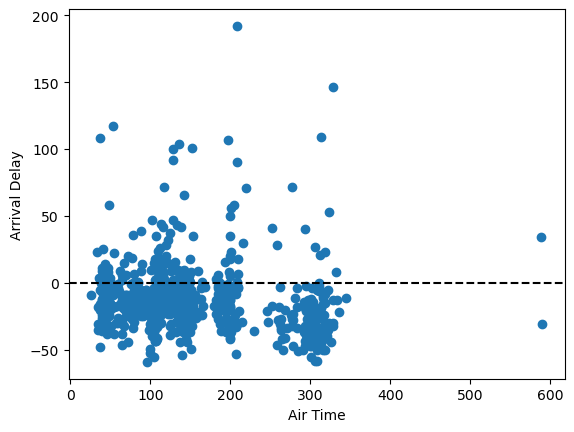

In [61]:
# Q: Any meaningful relationship between air time and arrival delay for flights from July 4th?

# filtering the july flights to july 4th
july4_flights = july_flights[july_flights['day'] == 4]

# create a scatter plot
plt.scatter(july4_flights['air_time'], july4_flights['arr_delay']) # choose variables for x and y axis

# we can add axis labels as well
plt.xlabel('Air Time') # add label on the x axis 
plt.ylabel('Arrival Delay') # add label on y axis

# add a horizonal line 
plt.axhline(y = 0.0, color = 'black', linestyle = "--") # "-" for a solid line

Text(0.5, 1.0, 'Departure Delay for Flights from July 4th')

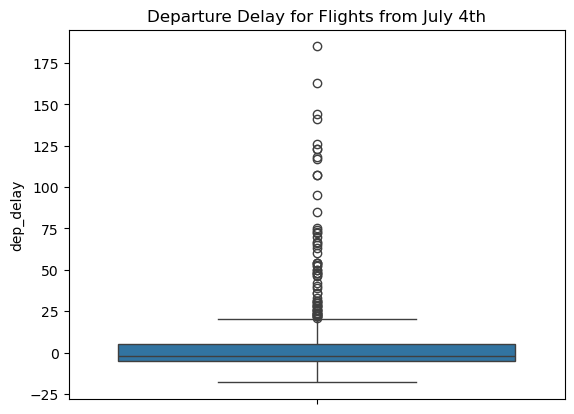

In [80]:
# Boxplot: shows distribution of quantatative data

sns.boxplot(data = july4_flights, y = 'dep_delay')
plt.title("Departure Delay for Flights from July 4th") # adding a title

Text(0.5, 1.0, 'Departure Delay for Flights by Each Origin from July 4th')

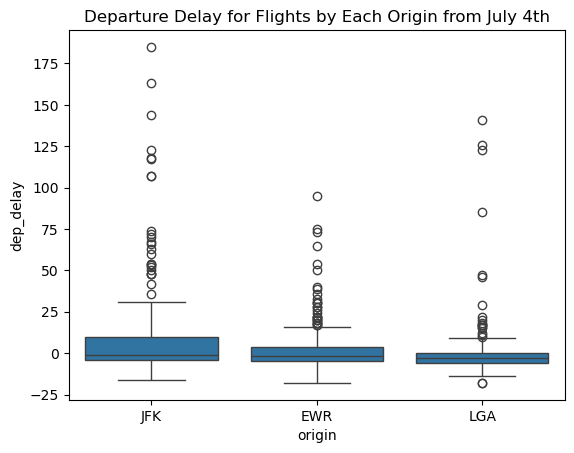

In [65]:
# boxplot of departure delay for each origin airport

sns.boxplot(data = july4_flights, x = 'origin', y = 'dep_delay')
plt.title("Departure Delay for Flights by Each Origin from July 4th") # adding a title

In [66]:
# 4. Modeling

In [67]:
# Classification: identifying which category an object belongs to
# Regression: identifying association among continuous-valued variables
# Clustering: automatic grouping of similar objects into sets
# Dimension reduction, model selection, preprocessing...

In [68]:
# For today, we do basic linear regression!

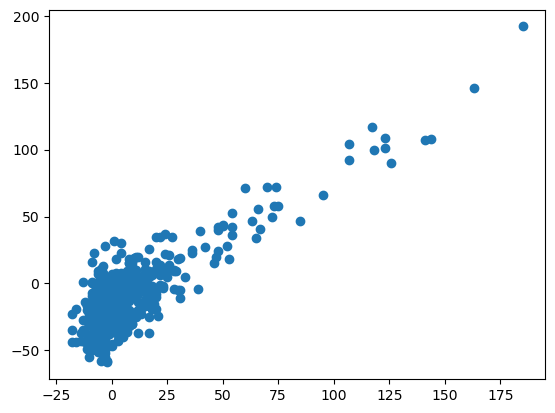

In [72]:
# Assumption: we miht find some linear relationship between departure delay and arrival delay

plt.scatter(x = july4_flights['dep_delay'], y = july4_flights['arr_delay'])

In [76]:
# maybe we can trype conduction linear regression between these two variables!

model = ols('arr_delay ~ dep_delay', data = july4_flights).fit() # fit gives optimal line between two variables

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              arr_delay   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1707.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.27e-193
Time:                        16:39:26   Log-Likelihood:                -2962.3
No. Observations:                 733   AIC:                             5929.
Df Residuals:                     731   BIC:                             5938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.3737      0.520    -31.511      0.000     -17.394     -15.354
dep_delay      0.9834      0.024     41.314      0.000       0.937       1.030
==============================================================================
Omnibus:                        3.900   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                4.578
Skew:                          -0.027   Prob(JB):                        0.101
Kurtosis:                       3.383   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='dep_delay', ylabel='arr_delay'>

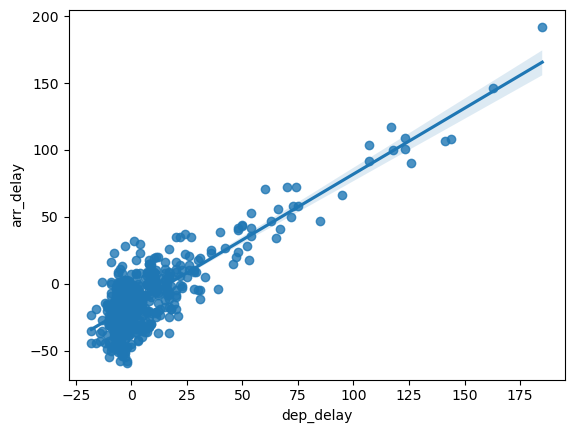

In [79]:
# We can even draw this "best linear line" explaining the relationship between the two variables

sns.regplot(x = 'dep_delay', y = 'arr_delay', data = july4_flights, scatter = True)